In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns




/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
def wrangle(filename1, filename2):
    df_train = pd.read_csv(filename1)
    df_test = pd.read_csv(filename2)

    # Remove columns with lots of missing values
    df_train.drop(columns=["Cabin","Name","Sex","Ticket","SibSp","Parch","Age"], inplace=True)
    df_test.drop(columns=["Cabin","Name","Sex","Ticket","SibSp","Parch","Age"], inplace=True)

    # Drop rows with any NaN values
    df_train.dropna(inplace=True)
    df_test.dropna(inplace=True)

    # Set PassengerId as index
    df_train.set_index('PassengerId', inplace=True)
    df_test.set_index('PassengerId', inplace=True)


    return df_train, df_test


In [3]:
X_train,X_test = wrangle("/kaggle/input/titanic-machine-learning-from-disaster/train.csv","/kaggle/input/titanic-machine-learning-from-disaster/test.csv")

In [4]:
X_train.head()

,Survived,Pclass,Fare,Embarked
PassengerId,,,,
1,0,3,7.2500,S
2,1,1,71.2833,C
3,1,3,7.9250,S
4,1,1,53.1000,S
5,0,3,8.0500,S


In [5]:
X_train["Survived"].value_counts(normalize=True)

Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Fare      889 non-null    float64
 3   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 34.7+ KB


<Axes: >

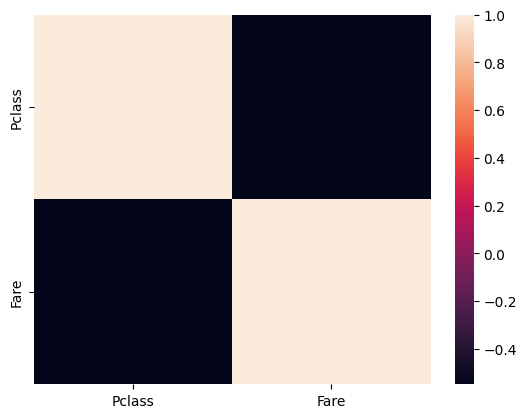

In [7]:
correlation = X_train.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(correlation)

<Axes: >

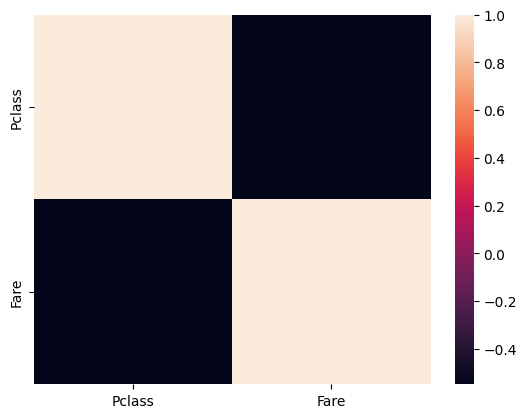

In [8]:
correlation = X_train.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(correlation)

In [9]:
X_train["Survived"].corr(X_train["Fare"])

0.2552904613046994

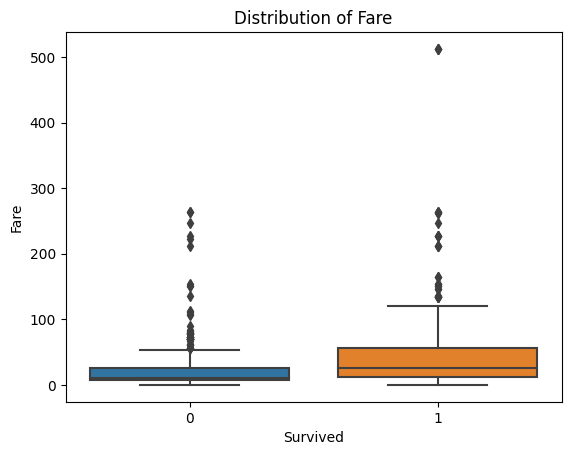

In [10]:
# Create boxplot
sns.boxplot(x= "Survived", y="Fare", data=X_train)

# Label axes
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Distribution of Fare");

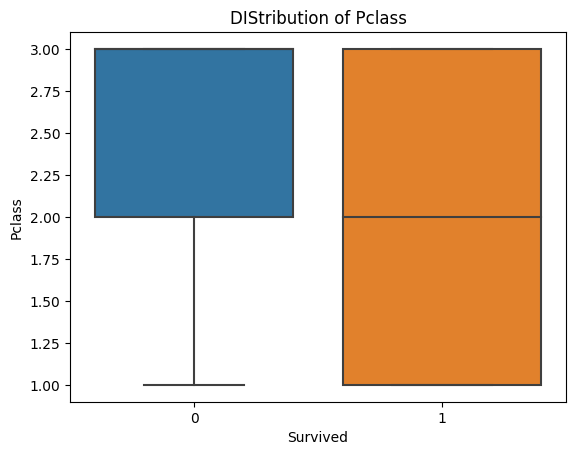

In [11]:
sns.boxplot(x= "Survived", y="Pclass", data=X_train)

# Label axes
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.title("DIStribution of Pclass");